In [2]:
!git clone https://github.com/rnogara/capybaras-vs-guinea_pigs

Cloning into 'capybaras-vs-guinea_pigs'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 215 (delta 0), reused 10 (delta 0), pack-reused 205 (from 1)
Receiving objects: 100% (215/215), 44.52 MiB | 20.67 MiB/s, done.


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
TRAINING_DIR = "capybaras-vs-guinea_pigs/dataset-images/training"
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=128,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "capybaras-vs-guinea_pigs/dataset-images/testing"
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                            batch_size=128,
                                                            class_mode='binary',
                                                            target_size=(150, 150))


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=90,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=6,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 2/90 ━━━━━━━━━━━━━━━━━━━━ 4:29 3s/step - acc: 0.5000 - loss: 0.6993

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - acc: 0.5000 - loss: 0.7023 - val_acc: 0.5000 - val_loss: 0.6990
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.5615 - loss: 0.6968 - val_acc: 0.5250 - val_loss: 0.6924
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.5435 - loss: 0.6918 - val_acc: 0.6750 - val_loss: 0.6920
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - acc: 0.5598 - loss: 0.6972 - val_acc: 0.6000 - val_loss: 0.6921
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - acc: 0.7438 - loss: 0.6902 - val_acc: 0.5250 - val_loss: 0.6925
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - acc: 0.4999 - loss: 0.6871 - val_acc: 0.5250 - val_loss: 0.6930
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.5189 - loss: 0.6623 - val_acc: 0.5250 - val_loss: 0.7556
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - acc: 0.4873 - loss: 0.7460 - val_acc: 0.4750 - val_loss: 0.6928
Epoch 9/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.5814 - loss: 0.

<Figure size 640x480 with 0 Axes>

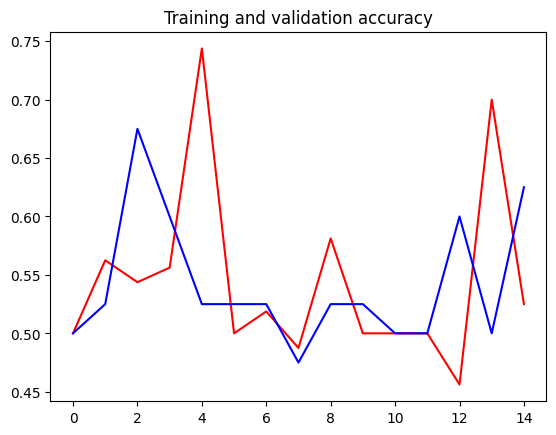

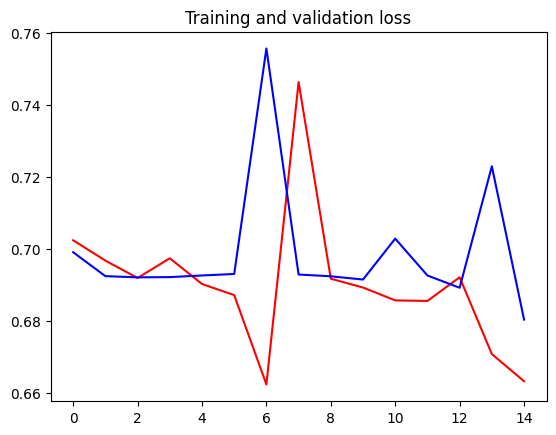

<Figure size 640x480 with 0 Axes>

In [13]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.figure()